# Pymaceuticals Inc.
---

### Analysis

- #There is a positive correlation between mouse weight and average tumor volume.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame *CHECK*
#mouse_data = mouse_metadata.merge(study_results, on="Mouse ID", how="left")
mouse_data = mouse_metadata.merge(study_results)

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice. *SHOULD BE IN 200s*
len(mouse_data["Mouse ID"].unique())

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# *looks as though desired output is an array? Should Be: array(['g989'], dtype=object)
mouse_data.loc[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
# *Create a new dataframe?
mouse_data.loc[mouse_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_data.loc[mouse_data["Mouse ID"] != "g989"]

In [64]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. *All should use groupby 
# Assemble the resulting series into a single summary DataFrame.
groupeddf = mouse_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Variance_Tumor_Volume=('Tumor Volume (mm3)', 'var'),
    Stdev_Tumor_Volume=('Tumor Volume (mm3)', 'std'),
    SEM_Tumor_Volume=('Tumor Volume (mm3)', 'sem'))

groupeddf

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data.groupby("Drug Regimen").agg(Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'), Variance_Tumor_Volume=('Tumor Volume (mm3)', 'var'), Stdev_Tumor_Volume=('Tumor Volume (mm3)', 'std'), SEM_Tumor_Volume=('Tumor Volume (mm3)', 'sem'))

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

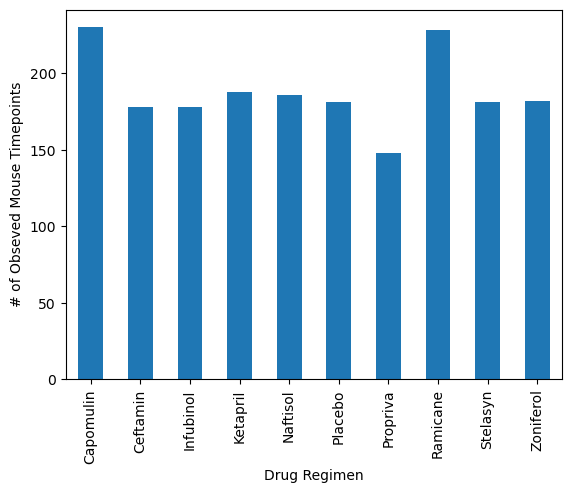

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

ax = mouse_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index().plot.bar(x="Drug Regimen", y="Mouse ID")
ax.set_ylabel("# of Obseved Mouse Timepoints")
ax.get_legend().remove()
plt.show()

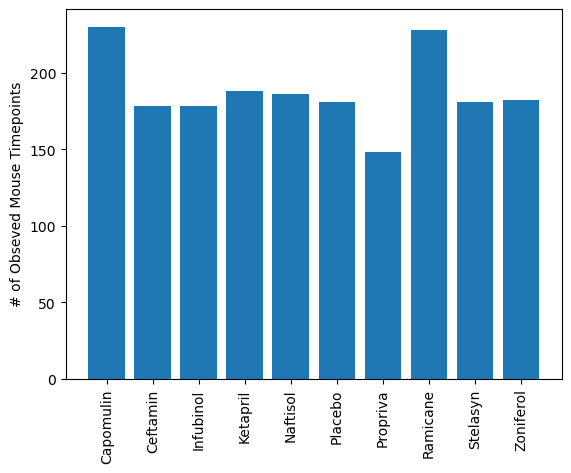

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df = mouse_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index()

plt.bar(df["Drug Regimen"].values, df["Mouse ID"].values)
plt.ylabel("# of Obseved Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

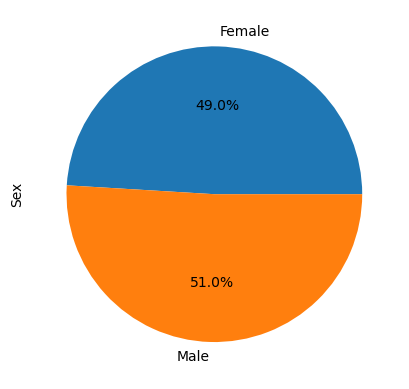

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ax = mouse_data.groupby("Sex")["Mouse ID"].count().plot.pie(y="Mouse ID", autopct='%1.1f%%')
ax.set_ylabel("Sex")
plt.show()

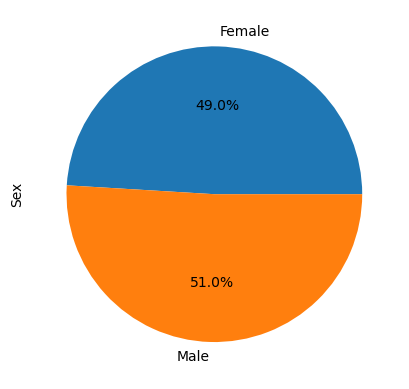

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df = mouse_data.groupby("Sex")["Mouse ID"].count().reset_index()

plt.pie(df["Mouse ID"].values, labels=df["Sex"].values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df = mouse_data.loc[mouse_data["Drug Regimen"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
maxdf = df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tpdf = df.merge(maxdf, on=["Mouse ID", "Timepoint"])
tpdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = list(tpdf["Drug Regimen"].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = tpdf['Tumor Volume (mm3)'].quantile(0.25)
Q3 = tpdf['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
outliers = tpdf[(tpdf['Tumor Volume (mm3)'] < (Q1 - 1.5 * IQR)) | (tpdf['Tumor Volume (mm3)'] > (Q3 + 1.5 * IQR))]
print(outliers['Tumor Volume (mm3)'])

# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset 
# Determine outliers using upper and lower bounds

for d in drugs:
    ddf = tpdf.loc[tpdf["Drug Regimen"] == d]
    Q1 = ddf['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = ddf['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ddf[(ddf['Tumor Volume (mm3)'] < (Q1 - 1.5 * IQR)) | (ddf['Tumor Volume (mm3)'] > (Q3 + 1.5 * IQR))]
    print(f"{d}'s potential outliers: {outliers['Tumor Volume (mm3)']}")

Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Tumor Volume (mm3)    Axes(0.125,0.11;0.775x0.77)
dtype: object

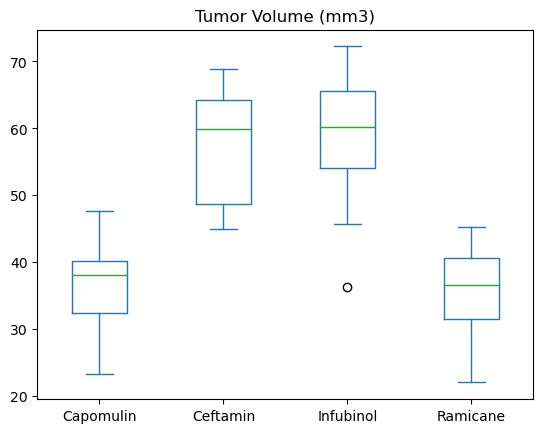

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tpdf.plot.box(column="Tumor Volume (mm3)", by="Drug Regimen")

## Line and Scatter Plots

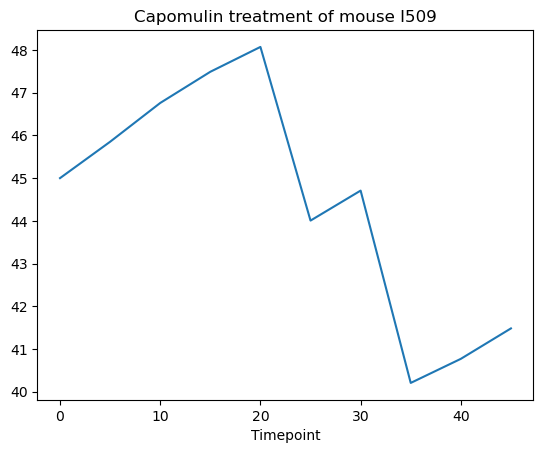

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

ax = mouse_data.loc[(mouse_data["Drug Regimen"]=="Capomulin") & (mouse_data["Mouse ID"] == "l509")].plot(x="Timepoint", y="Tumor Volume (mm3)")
ax.set_title("Capomulin treatment of mouse I509")
ax.get_legend().remove()

plt.show()

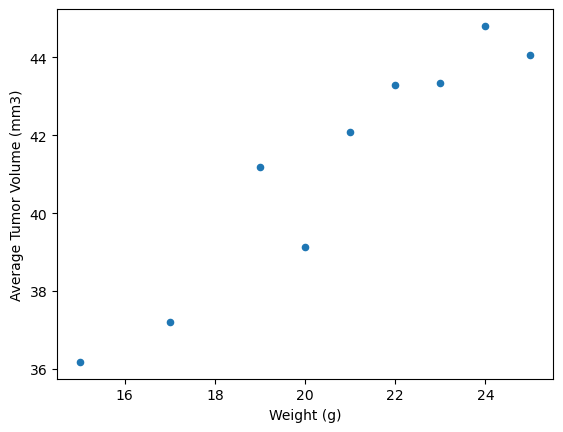

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df = mouse_data.loc[(mouse_data["Drug Regimen"]=="Capomulin")].groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()
ax = df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
ax.set_ylabel("Average Tumor Volume (mm3)")

#ax.get_legend().remove()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


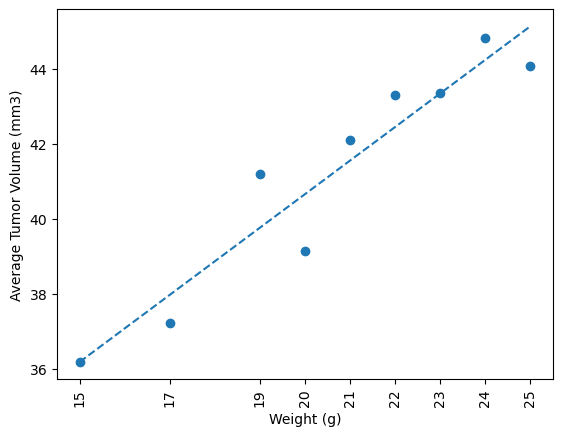

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr = df["Weight (g)"].corr(df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

X = df["Weight (g)"].values
Y = df["Tumor Volume (mm3)"].values

p_slope, p_int, p_r, p_p, p_std_err = st.linregress(X, Y)
p_fit = p_slope * X + p_int
plt.scatter(X,Y)
plt.plot(X,p_fit,"--")
plt.xticks(X, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()